N bosonic mode Hilbert space  
$\otimes^{N}_{k=1} \mathcal{H}_k$

vectorial operator  
$\hat{\mathbf{b}} = (\hat{a}_1, \hat{a}_1^{\dagger}, \dots, \hat{a}_N, \hat{a}_N^{\dagger})$ : 2N elements

bosonic commutation relations  
$[\hat{b}_i, \hat{b}_j] = \Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

$\mathbf{\Omega} = \oplus_{k=1}^{N}\omega\ \ \ 
\omega = 
\begin{pmatrix}
0 & 1 \\
-1 & 0 \\
\end{pmatrix}
$

Quadrature field  
$\hat{\mathbf{x}} = (\hat{q}_1, \hat{p}_1, \dots, \hat{q}_N, \hat{p}_N)$ : 2N elements

canonical commutation relation  
$[\hat{x}_i, \hat{x}_j] = 2i\Omega_{ij}\ \ (i, j = 1, \dots, 2N)$ 

任意の密度演算子$\hat{\rho}$を考える  
もし$\hat{\rho}^2 = \hat{\rho}$なら$\hat{\rho}$はpure state

任意の密度演算子は等価なWigner関数が存在する

Weyl operator  
$D(\xi) = \exp(i \hat{x}^T \Omega \hat{\xi})$  

これを用いて、Wigner characteristic functionを定義できる  
$\chi (\xi) = \mathrm{Tr}[\hat{\rho}D(\xi)]$

Wigner characteristic functionのフーリエ変換がWigner function  
$W(\mathbf{x}) = \int_{R^{2N}} \frac{d^{2N}}{(2\pi)^{2N}} \exp{(-i \hat{x}^T \Omega \hat{\xi})} \chi (\xi)$

Wigner functionは統計量でも定義できる  

- first moment  
$\bar{\mathbf{x}} = \langle \hat{\mathbf{x}} \rangle= \mathrm{Tr}[\hat{\mathbf{x}} \hat{\rho}]$

- second moment  
$V_{ij} = \frac{1}{2}\langle \{\Delta\hat{x}_i, \Delta\hat{x}_j \}\rangle$  
$\{ A, B \} = AB+BA$

$V_{ii}$は$\hat{x}_i$の分散をあらわす

Gaussian stateは最初の2モーメントだけで完全に記述可能

Quadrature operatorにおいては、Gaussian UnitaryはAffien写像で書ける！  
$(\mathbf{S}, \mathbf{d}) : \hat{\mathrm{x}}\to \mathbf{S}\mathrm{x} + \mathbf{d}$

Williamson's Theorem  
任意の偶数次元の正定値実行列はsimplectic transformで対角化できる  
$\mathbf{V} = \mathbf{SV}^{\oplus}\mathbf{S}^{T}$  
$\mathbf{V}^{\oplus} = \oplus^{N}_{k=1} \nu_k \mathbf{I}$

Measurement  
POVM: $\Pi_i = E_{i}^{\dagger}E_i\ \ \ (\sum_i E_{i}^{\dagger}E_i = I)$  
これを連続量に置き換える  

Gaussian Measurementとは、Gaussian stateに対して行い、出力結果がGaussian Distributionで、測定しなかったモードはGaussian stateのままである

測定するsubsystemを$\mathbf{B}$として、それ以外のsubsystemを$\mathbf{A}$とする。

測定結果の確率分布：測定モード以外の直交位相を周辺化したGaussian Wigner分布
測定後の状態：以下のようになる。※測定結果には依存しない

$\mathbf{V} = \mathbf{A} - \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}\mathbf{C}^T$  
$\mathbf{\Pi} = \rm{diag}(1, 0)$     ($\hat{x}$測定の場合)

$\mathbf{\Pi B \Pi}$は非正則。pseudo-inverseを用いる。  
$(\mathbf{\Pi B \Pi})^{-1} = B_{11}^{-1}\Pi$

これは多変量ガウス分布の条件付き分布をとるのと基本的に同じ  
なので同様に測定後の状態の平均もとれる

$\mathbf{\mu} = \mathbf{\mu_A} + \mathbf{C}(\mathbf{\Pi B \Pi})^{-1}(\mathbf{\mu_B} - x_B\mathbf{\Pi})$

In [1]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

import strawberryfields as sf
from strawberryfields.ops import *

Gaussian Wigner function

$$
W(\xi) = \frac{1}{(2\pi)^{N} \sqrt{\det V^{(N)}}} \exp{\{ -\frac{1}{2}\xi [V^{(N)}]^{-1} \xi^{T} \}}
$$

$$
Tr[\hat{\rho}\ (\Delta \hat{\xi_{i}} \Delta \hat{\xi_{j}} + \Delta \hat{\xi_{j}} \Delta \hat{\xi_{i}})\ /\ 2] \\
= \left< \left(\hat{\xi_{i}} \hat{\xi_{j}} + \hat{\xi_{j}} \hat{\xi_{i}}\right)\ /\ 2 \right> \\
= \int W(\xi)\xi_i \xi_j d^{2N} \xi
=V^{(N)}_{ij}
$$


$$
V^{(N)} \to V^{(N)'} = S V^{N} S^T
$$

In [224]:
class Gaussian_trans():
    def __init__(self, N):
        self.N = N # num of qumode
        self.V = np.eye(2 * N)
        self.mu = np.zeros(2 * N)
        #self.V = []
        #for i in range(N):
         #   self.V.append(np.eye(2))
        #self.V = np.array(self.V)
        
    def Xsqueeze(self, idx, r):
        idx = 2 * idx
        S = np.eye(2 * self.N)
        S[idx:idx+2, idx:idx+2] = np.array([[np.exp(-r), 0], [0, np.exp(r)]])
        self.V = np.dot(S, np.dot(self.V, S.T))
        self.mu = np.dot(S, self.mu)
        
    def Psqueeze(self, idx, r):
        idx = 2 * idx
        S = np.eye(2 * self.N)
        S[idx:idx+2, idx:idx+2] = np.array([[np.exp(r), 0], [0, np.exp(-r)]])
        self.V = np.dot(S, np.dot(self.V, S.T))
        self.mu = np.dot(S, self.mu)
        
    def rotation(self, idx, theta):
        idx = 2 * idx
        S = np.eye(2 * self.N)
        S[idx:idx+2, idx:idx+2] = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        self.V = np.dot(S, np.dot(self.V, S.T))
        self.mu = np.dot(S, self.mu)
        
    def BS(self, idx1, idx2, theta):
        idx1 = 2 * idx1
        idx2 = 2 * idx2
        S = np.eye(2 * self.N)
        S[idx1:idx1+2, idx1:idx1+2] = np.array([[np.sin(theta), 0], [0, np.sin(theta)]])
        S[idx1:idx1+2, idx2:idx2+2] = np.array([[np.cos(theta), 0], [0, np.cos(theta)]])
        S[idx2:idx2+2, idx1:idx1+2] = np.array([[np.cos(theta), 0], [0, np.cos(theta)]])
        S[idx2:idx2+2, idx2:idx2+2] = np.array([[-np.sin(theta), 0], [0, -np.sin(theta)]])
        self.V = np.dot(S, np.dot(self.V, S.T))
        self.mu = np.dot(S, self.mu)
        
    def twoModeSqueezing(self, idx1, idx2,  r):
        idx1 = 2 * idx1
        idx2 = 2 * idx2
        S = np.eye(2 * self.N)
        S[idx1:idx1+2, idx1:idx1+2] = np.array([[np.cosh(r), 0], [0, np.cosh(r)]])
        S[idx1:idx1+2, idx2:idx2+2] = np.array([[np.sinh(r), 0], [0, -np.sinh(r)]])
        S[idx2:idx2+2, idx1:idx1+2] = np.array([[np.sinh(r), 0], [0, -np.sinh(r)]])
        S[idx2:idx2+2, idx2:idx2+2] = np.array([[np.cosh(r), 0], [0, np.cosh(r)]])
        self.V = np.dot(S, np.dot(self.V, S.T))
        self.mu = np.dot(S, self.mu)        
    
    def Displace(self, idx, alpha):
        dx = 2 * np.real(alpha)
        dp = 2 * np.imag(alpha)
        self.mu[idx:idx+2] = self.mu[idx:idx+2] + np.array([dx, dp])
        
    def Xgate(self, idx, dx):
        self.mu[2 * idx] += dx

    def Zgate(self, idx, dp):
        self.mu[2 * idx + 1] += dp
        
    def MeasureX(self, idx):
        res = np.random.normal(self.mu[2 * idx], np.sqrt(self.V[2 * idx, 2 * idx]))
        self.mu, self.V = self.StateAfterMeasurement(idx, res, np.diag([1, 0]))        
        return res
    
    def MeasureP(self, idx):
        res = np.random.normal(self.mu[2 * idx + 1], np.sqrt(self.V[2 * idx + 1, 2 * idx + 1]))
        self.mu, self.V = self.StateAfterMeasurement(idx, res, np.diag([0, 1]))
        return res

    def plotGaussianWigner(self, idx):
        idx = idx * 2
        x = np.arange(-5, 5, 0.1)
        p = np.arange(-5, 5, 0.1)
        m = len(x)
        xx, pp = np.meshgrid(x, p)
        xi_array = np.dstack((pp, xx))
        W = np.zeros((m, m))
        for i in range(m):
            for j in range(m):
                W[i][j] = self.GaussianWigner(xi_array[j][i], self.V[idx:idx+2, idx:idx+2], self.mu[idx:idx+2])
        h = plt.contourf(x, p, W)
        plt.show()

    def GaussianWigner(self, xi, V, mu):
        xi = xi - mu
        xi_tmp = np.ravel(xi)
        N = np.int(len(xi_tmp) / 2)
        det_V = np.linalg.det(V)
        V_inv = np.linalg.inv(V)
        W = (2 * np.pi)**(-N) / np.sqrt(det_V) * np.exp(-1/2 * np.dot(xi_tmp, np.dot(V_inv, xi_tmp.T)))
        return W
    
    def StateAfterMeasurement(self, idx, res, Pi):
        subSysA = np.delete(np.delete(self.V, [2 * idx, 2 * idx + 1], 0), [2 * idx, 2 * idx + 1], 1)
        subSysB = self.V[(2 * idx):(2 * idx + 2), (2 * idx):(2 * idx + 2)]
        arrayList = []
        for j in range(self.N):
            if j != idx:
                arrayList.append(self.V[(2 * j):(2 * j + 2), (2 * idx):(2*idx + 2)])
        C = np.concatenate(arrayList)
        post_V = subSysA - np.dot(C, np.dot(1 / np.sum(subSysB * Pi) * Pi, C.T))
        post_V = np.insert(post_V, 2 * idx, [[0], [0]], axis = 0)
        post_V = np.insert(post_V, 2 * idx, [[0], [0]], axis = 1)
        post_V[2 * idx, 2 * idx] = 1
        post_V[2 * idx + 1, 2 * idx + 1] = 1
        
        post_mu = np.delete(self.mu, [2 * idx, 2 * idx + 1]) - \
        np.dot(np.dot(C, 1 / np.sum(subSysB * Pi) * Pi), res * np.diag(Pi) - self.mu[(2 * idx):(2 * idx + 2)])
        post_mu = np.insert(post_mu, 2 * idx, [0, 0])
        
        return post_mu, post_V

In [178]:
def test_1():
    G = Gaussian_trans(2) # two qumode [0, 1]
    G.Displace(0, 2, 0) # Displacement gate, x to x+2
    G.Xsqueeze(0, 1) # X squeeIng gate, r=1
    G.rotation(0, np.pi/4) # pi/4 rotation gate
    G.BS(0, 1, np.pi/4) # 50:50 beam splitter
    x = G.MeasureP(1)
    #G.plotGaussianWigner(0) # plot
    #print(x)
    #print('mu0 =', G.mu[0:2]) # mu of qumode 0
    #print('cov0 =', G.V[0:2, 0:2]) # mu of qumode 1
    return G.mu[0:2]

In [179]:
def test_2():
    eng = sf.Engine(backend="gaussian")
    test = sf.Program(2)

    with test.context as q:
        # prepare the initial states
        Dgate(2) | q[0] # displacement gate
        Sgate(1) | q[0] # position squeezed
        Rgate(np.pi/4) | q[0] # rotation gate
        BSgate(np.pi/4, 0) | (q[0], q[1])  # 50-50 beamsplitter

        # perform the homodyne measurements
        MeasureP | q[1]

    results = eng.run(test)
    mu0, cov0 = results.state.reduced_gaussian([0])
    mu1, cov1 = results.state.reduced_gaussian([1])
    #print('mu0 =', mu0)
    #print('cov0 =', cov0)

    return mu0

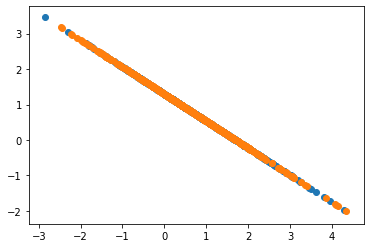

In [180]:
listx1 = []
listp1 = []
listx2 = []
listp2 = []
for i in range(500):
    mu1 = test_1()
    mu2 = test_2()
    listx1.append(mu1[0])
    listp1.append(mu1[1])
    listx2.append(mu2[0])
    listp2.append(mu2[1])

plt.scatter(listx1, listp1)
plt.scatter(listx2, listp2)

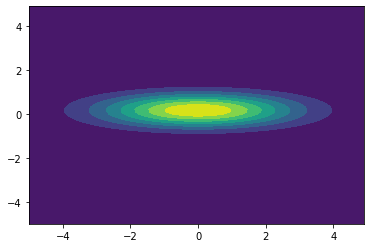

0.1710910488486479
V = [[3.76219569 0.         0.         0.        ]
 [0.         0.26580223 0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


In [181]:
G = Gaussian_trans(2) # two qumode [0, 1]
#G.Xsqueeze(0, 1) # X squeeIng gate, r=1
#G.rotation(0, np.pi/4) # pi/4 rotation gate
G.Displace(0, 0, 0)
G.twoModeSqueezing(0, 1, 1)
x = G.MeasureP(1)
G.plotGaussianWigner(0) # plot
print(x)
print('V =', G.V)

In [230]:
G = Gaussian_trans(3)
G.Displace(0, 1 + 0.5j)
G.Psqueeze(1, 2)
G.Xsqueeze(2, 2)
G.BS(1, 2, np.pi/4) # 50:50 beam splitter
G.BS(0, 1, np.pi/4) # 50:50 beam splitter
x0 = G.MeasureX(0)
p1 = G.MeasureP(1)
G.Xgate(2, x0 * np.sqrt(2))
G.Zgate(2, p1 * np.sqrt(2))
#G.plotGaussianWigner(1) # plot
print('measured x =', x0)
print('measured p =', p1)
#print('mu =', G.mu[4:6] + np.array([x0*np.sqrt(2), p1*np.sqrt(2)])) # mu of qumode 0
print('mu =', G.mu[4:6]) # mu of qumode 0
print('cov =', G.V) # covarince of qumode 1

measured x = 2.507339169325963
measured p = 7.182262922204294
mu = [2.05561023 1.32940857]
cov = [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [225]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt

# initialize engine and program objects
eng = sf.Engine(backend="gaussian")
teleportation = sf.Program(3)

with teleportation.context as q:
    psi, alice, bob = q[0], q[1], q[2]

    # state to be teleported:
    Coherent(1+0.5j) | psi

    # 50-50 beamsplitter
    BS = BSgate(pi/4, 0)

    # maximally entangled states
    Squeezed(-2) | alice
    Squeezed(2) | bob
    BS | (alice, bob)

    # Alice performs the joint measurement
    # in the maximally entangled basis
    BS | (psi, alice)
    MeasureX | psi
    MeasureP | alice

    # Bob conditionally displaces his mode
    # based on Alice's measurement result
    Xgate(scale(psi, sqrt(2))) | bob
    Zgate(scale(alice, sqrt(2))) | bob
    # end circuit

results = eng.run(teleportation)
print(q[0].val, q[1].val)
# view Bob's output state and fidelity
mu0, cov0 = results.state.reduced_gaussian([2])
print(mu0)
#print(mu0 + np.array([q[0].val*np.sqrt(2), q[1].val*np.sqrt(2)]))
#print(results.state.displacement([2]))
#print(results.state.fidelity_coherent([0, 0, 1+0.5j]))


2.6190465675821724 3.475245579369776
[2.06129319 1.1408228 ]


In [221]:
A = np.arange(3)
A[1] += 2
A

array([0, 3, 2])